# Sales Analysis
## Objectives
-  What was the best month for sales? How much was earned that month?
-  What city sold the most product?
-  What time should we display advertisements to maximize likelihood of customer's buying product?
-  What product sold the most? Why do you think it sold the most?

### Import necessary libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./sales data real world/Sales_April_2019.csv')

In [3]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
data.shape

(18383, 6)

### Merge the 12 months sales data into single csv

In [5]:
import os

In [6]:
files = [i for i in os.listdir('./sales data real world')]

In [7]:
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [8]:
data = pd.DataFrame()

for i in files:
    df = pd.read_csv('./sales data real world'+'/'+ i)
    data = pd.concat([data,df])

### Read in updated dataframe

In [9]:
data.shape

(186850, 6)

In [10]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

##### Drop rows of NAN

In [11]:
data.isnull().sum().sum()

3270

In [12]:
data.dropna(inplace =True)

#### In the order date columns , it contains some text value , we need to remove them

### Get rid of text in order date column

In [14]:
data = data[data['Order Date'].str[0:2] != 'Or']

### Make columns correct type

In [18]:
data['Quantity Ordered'] = data['Quantity Ordered'].astype('int32')
data['Price Each'] = data['Price Each'].astype('float64')

### Augment data with additional columns
#### Add month column

In [23]:
data['month'] = data['Order Date'].str[0:2]
data['month'] = data['month'].astype(int)

In [25]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add city column

In [30]:
data['city'] =  (data['Purchase Address'].str.split(',') .str[1]
                .str.strip()+ " (" +  data['Purchase Address']  .str.split(',') .str[2].str.split(' ') .str[1]+ ")")

In [31]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


### Data Exploration!
Question 1: What was the best month for sales? How much was earned that month?

In [32]:
data['total sales'] = data['Quantity Ordered'] * data['Price Each']

In [42]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,total sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


In [34]:
data.groupby('month')['total sales'].sum().sort_values(ascending = False)

month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: total sales, dtype: float64

Text(0, 0.5, 'sales')

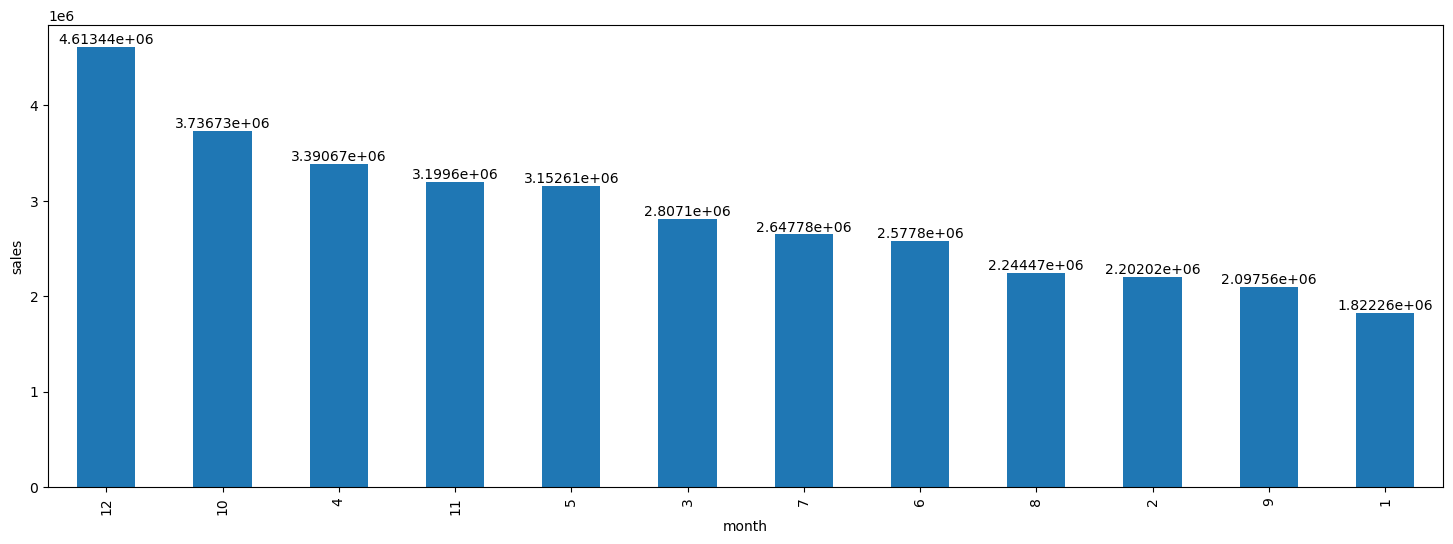

In [44]:
plt.figure(figsize = (18,6))
ax = data.groupby('month')['total sales'].sum().sort_values(ascending = False).plot(kind = 'bar')

for i in ax.containers:
    ax.bar_label(i)
    
plt.ylabel('sales')

## The best month for sales is december and the sales amount was 4613443.34

Question 2: What city sold the most product?

In [47]:
data['city'].unique()

array(['Dallas (TX)', 'Boston (MA)', 'Los Angeles (CA)',
       'San Francisco (CA)', 'Seattle (WA)', 'Atlanta (GA)',
       'New York City (NY)', 'Portland (OR)', 'Austin (TX)',
       'Portland (ME)'], dtype=object)

In [49]:
city_data = data.groupby('city')['total sales'].sum().sort_values(ascending = False).reset_index()

In [50]:
city_data

,city,total sales
0,San Francisco (CA),8262203.91
1,Los Angeles (CA),5452570.80
2,New York City (NY),4664317.43
3,Boston (MA),3661642.01
4,Atlanta (GA),2795498.58
5,Dallas (TX),2767975.40
6,Seattle (WA),2747755.48
7,Portland (OR),1870732.34
8,Austin (TX),1819581.75
9,Portland (ME),449758.27


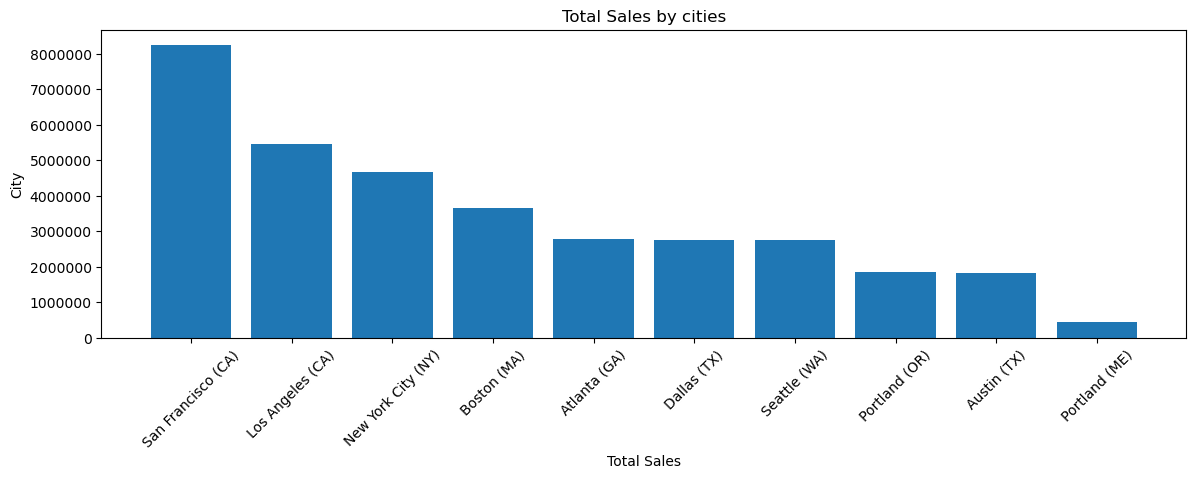

In [52]:
%matplotlib inline
plt.figure(figsize = (14,4))
plt.bar( city_data['city'], city_data['total sales'])
plt.title('Total Sales by cities')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.xticks(rotation=45)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

### San Francisco (CA) sold maximum

Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

#### Add Hour and Minute columns

In [53]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

C:\Users\Niharika\AppData\Local\Temp\ipykernel_30748\3021409918.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Order Date'] = pd.to_datetime(data['Order Date'])


In [57]:
data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
month                        int32
city                        object
total sales                float64
hour                         int32
minute                       int32
dtype: object

In [55]:
data['hour'] = data['Order Date'].dt.hour
data['minute'] = data['Order Date'].dt.minute

In [56]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,total sales,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27


In [58]:
hour = pd.DataFrame(data.groupby('hour')['hour'].count().sort_values(ascending = False))

<Axes: xlabel='hour'>

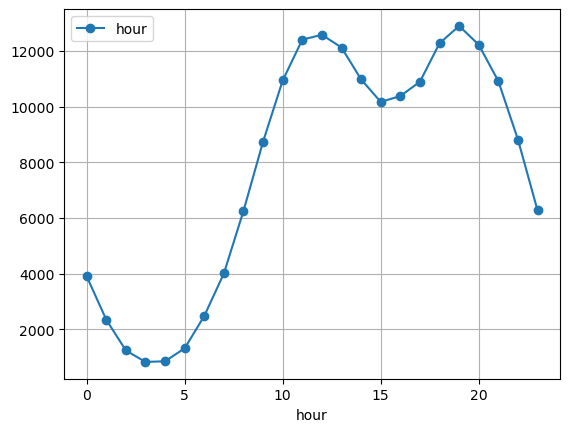

In [59]:
pd.DataFrame(data.groupby('hour')['hour'].count()).plot(grid = True, marker = 'o')

## we should display time at 6:30 to 7 pm to maximise likelihood of cutomer buying product

Question 4: What product sold the most? Why do you think it sold the most?

In [60]:
data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending =False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int32

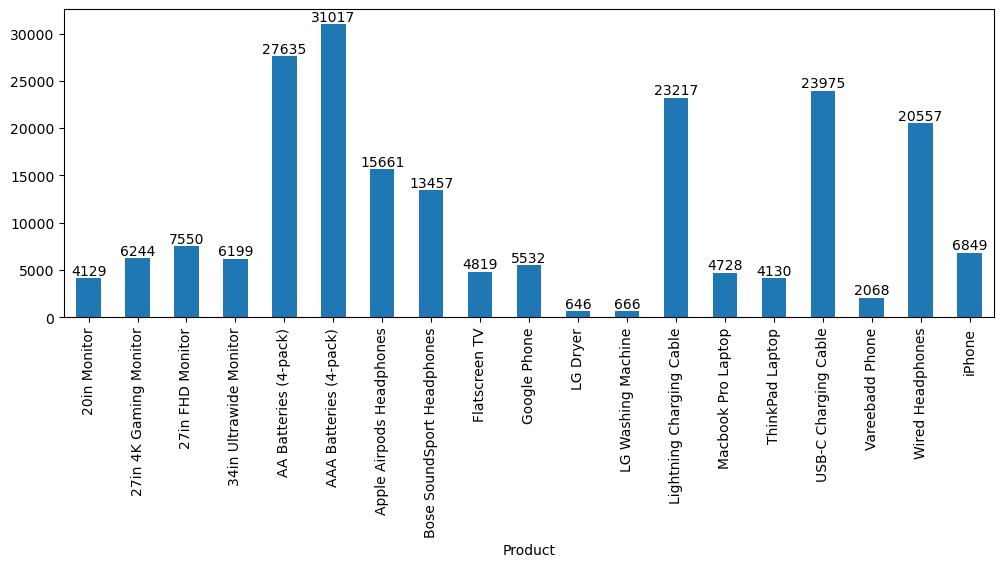

In [61]:
plt.figure(figsize = (12,4))
ax = data.groupby('Product')['Quantity Ordered'].sum().plot(kind = 'bar')

for i in ax.containers:
    ax.bar_label(i)

### AAA Batteries (4-pack) sold the most

In [62]:
data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

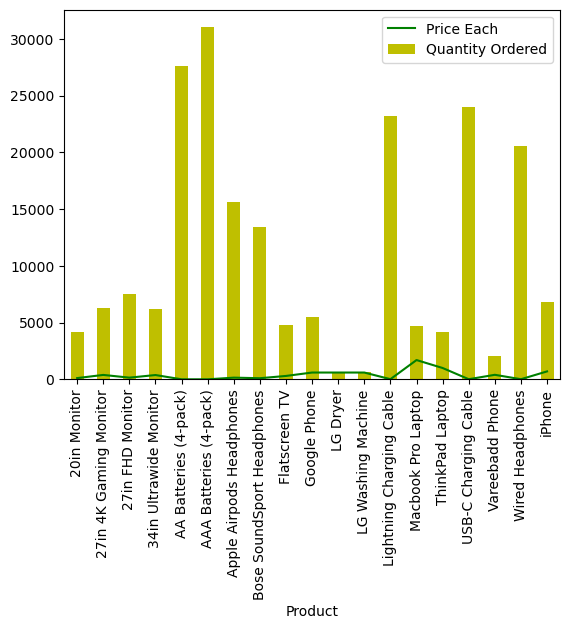

In [65]:
data.groupby('Product')['Price Each'].mean().plot(kind = 'line', color = 'g')
data.groupby('Product')['Quantity Ordered'].sum().plot(kind = 'bar', color = 'y')
plt.legend()

### Because of price AAA Batteries (4-pack) sold the most